In [1]:
protein = "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"
from disassembly.simulate_proteolysis import (
    simulate_proteolysis,
    enzyme_set,
    enzyme,
)
from disassembly.util import amino_acids

n_generate = 1000

k_enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
    ],
    [1],
    [1],
)

kr_enzymes = enzyme_set(
    [
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
    ],
    [1],
    [1],
)

viat_enzymes = enzyme_set(
    [
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [1],
    [1],
)

krviat_enzymes = enzyme_set(
    [
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [1, 1],
    [1, 1],
)

random_enzymes = enzyme_set(
    [enzyme({aa: 1 / len(amino_acids) for aa in amino_acids.values()}, "random")],
    [1],
    [1],
)

In [2]:
generated_peptidomes = {"name": [], "peptidome": []}

names = ["k", "kr", "krviat", "viat", "random"]

i = 0
for enz, name in zip(
    [k_enzymes, kr_enzymes, krviat_enzymes, viat_enzymes, random_enzymes], names
):
    for i in range(10):
        generated_peptidome = simulate_proteolysis(
            protein,
            n_start=1,
            n_generate=n_generate,
            endo_or_exo_probability=[0.9, 0.1],
            enzymes=enz,
            graph=False,
            accept_condition=False,
            verbose=False,
        )
        generated_peptidomes["name"].append(f"{name}_{i}")
        generated_peptidomes["peptidome"].append(generated_peptidome)

In [3]:
from disassembly.util import KL, normalize_dict
from disassembly.estimate_parameters import compare

comparisons = {}
for i in range(len(generated_peptidomes["peptidome"])):
    name_comp_1 = generated_peptidomes["name"][i]
    peptidome_comp_1 = generated_peptidomes["peptidome"][i]
    comparisons[name_comp_1] = {}
    for j in range(len(generated_peptidomes["peptidome"])):
        name_comp_2 = generated_peptidomes["name"][j]
        peptidome_comp_2 = generated_peptidomes["peptidome"][j]
        p, q = compare(peptidome_comp_1, peptidome_comp_2)
        err = KL(p, q) + KL(q, p)
        comparisons[name_comp_1][name_comp_2] = err

import pandas as pd

comps_df = pd.DataFrame(comparisons)

/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


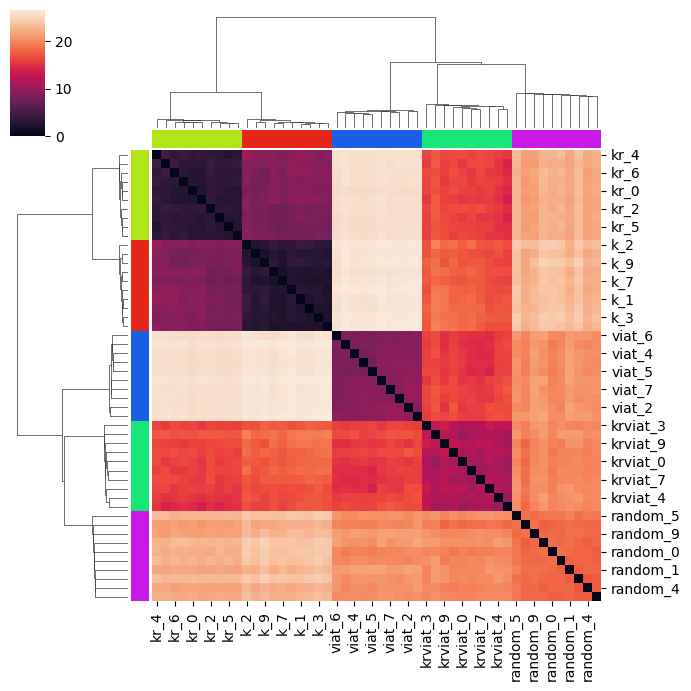

In [4]:
import seaborn as sns

lut = dict(zip(names, sns.hls_palette(len(names), l=0.5, s=0.8)))

lst = []
for i, n in enumerate(names):
    lst += [f"{n}"] * 10

row_colors = pd.DataFrame(lst)[0].map(lut)


sns.clustermap(
    comps_df,
    figsize=(7, 7),
    row_colors=row_colors.to_numpy(),
    col_colors=row_colors.to_numpy(),
)

In [5]:
from disassembly.simulate_proteolysis import simulate_proteolysis, enzyme_set, enzyme


# Say we want to estimate parameters for K enzyme.
enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [0,0,1],  # activities
    [0,0,1],  # abundances
)


true_dict, sequence_graph = simulate_proteolysis(
    protein,
    n_start=1,
    n_generate=n_generate,
    endo_or_exo_probability=[0.9, 0.1],
    enzymes=enzymes,
    graph=True,
    accept_condition=False,
)

 998 / 1000 (480)
524 unique peptides. 1002 total


Iteration: 0
	V: 13.75 | 21.44
V better!
	V: 13.44 | 13.75
V better!
	V: 10.40 | 13.44
V better!
	V: 9.22 | 10.40
V better!
	V: 10.38 | 9.22
	I: 9.69 | 9.22
	L: 16.05 | 9.22
	E: 17.46 | 9.22
	Q: 12.23 | 9.22
	D: 15.50 | 9.22
	N: 14.66 | 9.22
	H: 13.13 | 9.22
	W: 11.34 | 9.22
	F: 16.28 | 9.22
	Y: 12.11 | 9.22
	R: 14.85 | 9.22
	K: 17.40 | 9.22
	S: 14.26 | 9.22
	T: 12.95 | 9.22
	M: 10.67 | 9.22
	A: 12.58 | 9.22
	G: 17.95 | 9.22
	P: 14.06 | 9.22
	C: 12.62 | 9.22
Iteration: 1
	V: 9.16 | 9.22
V better!
	V: 9.01 | 9.16
V better!
	V: 8.89 | 9.01
V better!
	V: 9.02 | 8.89
	I: 12.77 | 8.89
	L: 17.28 | 8.89
	E: 15.13 | 8.89
	Q: 12.84 | 8.89
	D: 17.15 | 8.89
	N: 15.39 | 8.89
	H: 13.95 | 8.89
	W: 10.29 | 8.89
	F: 15.52 | 8.89
	Y: 13.03 | 8.89
	R: 13.57 | 8.89
	K: 17.19 | 8.89
	S: 17.05 | 8.89
	T: 12.59 | 8.89
	M: 9.87 | 8.89
	A: 12.30 | 8.89
	G: 16.59 | 8.89
	P: 13.65 | 8.89
	C: 9.64 | 8.89
Iteration: 2
	V: 11.66 | 8.89
	I: 8.79 | 8.89
I better!
	I: 10.89 | 8.79
	L: 16.30 | 8.79
	E: 14.80 | 8.79
	Q

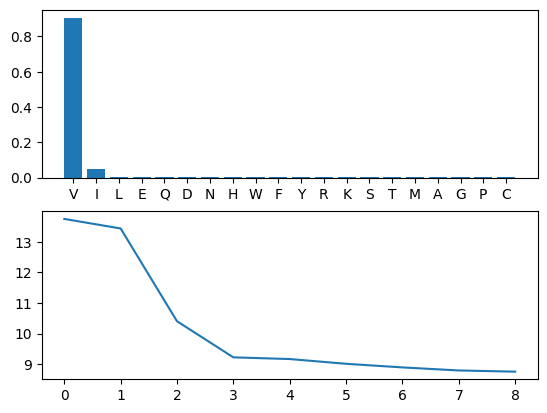

In [6]:
from disassembly.estimate_parameters import ParameterEstimator

pe = ParameterEstimator()

parameters = pe.estimate(protein, true_dict, n_generate=n_generate, n_iterations_endo=5)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1)
axs[0].bar(parameters["endo"].keys(), parameters["endo"].values())
axs[1].plot(pe.best_losses)
print(parameters["exo"])

 99 / 100 | 7.05, kl: 0.33, reg: 6.73  | nz: 4530 |  

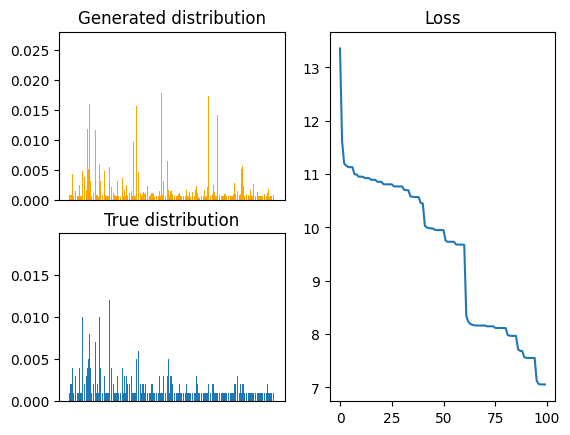

In [22]:
from disassembly.estimate_weights_gd import WeightEstimatorGD

wegd = WeightEstimatorGD(lr=0.1, n_iterations=100, lam=0.1)

G = wegd.run(true_dict, verbose=True, parameters=parameters)
generated = wegd.generated
losses = wegd.losses
weights = wegd.weights

fig, axs = plt.subplot_mosaic(
    [["generated", "loss"], ["true", "loss"]], width_ratios=[2, 2]
)


axs["true"].bar(
    true_dict.keys(), [v / sum(true_dict.values()) for v in true_dict.values()]
)
axs["generated"].bar(
    generated[len(generated.keys()) - 1].keys(),
    generated[len(generated.keys()) - 1].values(),
    color="orange",
)
axs["loss"].plot(losses)
axs["true"].set_title("True distribution")
axs["generated"].set_title(f"Generated distribution")
axs["loss"].set_title("Loss")
axs["true"].set_xticks([])
axs["generated"].set_xticks([])
plt.show()

0.5706039755351682

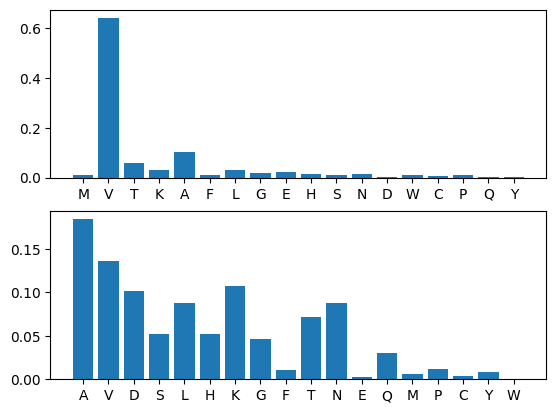

In [23]:
from disassembly.cut_site import get_p1

p1, p1_exo, exo, endo = get_p1(G, 5000)
fig, axs = plt.subplots(2, 1)
axs[0].bar(p1.keys(), height=p1.values())
axs[1].bar(p1_exo.keys(), height=p1_exo.values())
endo / (exo + endo)

0.8301211453744494

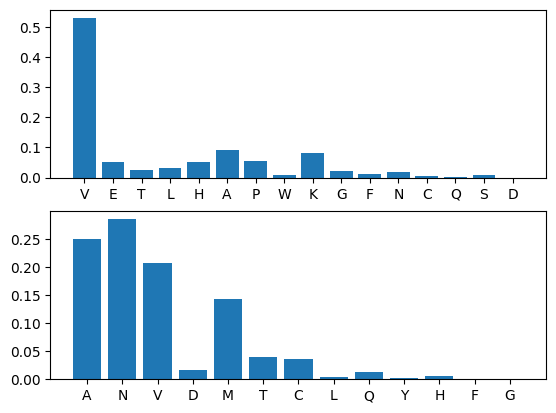

In [24]:
p1, p1_exo, exo, endo = get_p1(sequence_graph, 5000)
fig, axs = plt.subplots(2, 1)
axs[0].bar(p1.keys(), height=p1.values())
axs[1].bar(p1_exo.keys(), height=p1_exo.values())
endo / (exo + endo)

In [25]:
from disassembly.disassembly import get_disassembly_indexes_mc
from disassembly.disassembly import get_disassembly

print("Real")
real_disassembly_indexes = get_disassembly_indexes_mc(sequence_graph, N_particles=10000)
get_disassembly(true_dict, real_disassembly_indexes)
print("Estimated")
mc_di = get_disassembly_indexes_mc(G, 10000)
get_disassembly(true_dict, mc_di)

Real

 Averaged DI: 3.87
Estimated

 Averaged DI: 4.58


316.38179536096743

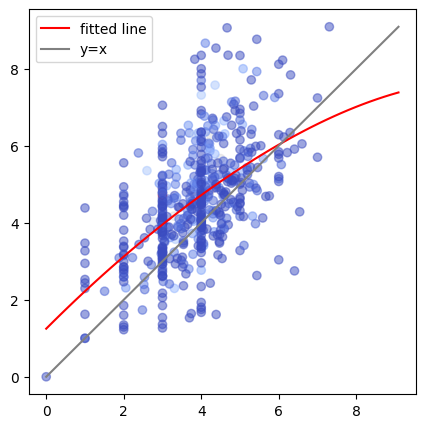

In [26]:
from disassembly.util import plot_di_correlation

plot_di_correlation(true_dict, real_disassembly_indexes, mc_di)